# Parte B - Analise e Descricao das Variaveis

Inicializaçao e seleção, dentre os dados brutos, os dado de interesse para o objetivo do trabalho

In [433]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


In [434]:
PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(__name__))), "data/2025MAE121dados.xlsx")
dados_brutos = pd.read_excel(PATH, sheet_name="dados")
dados_brutos = dados_brutos[['Ident', 'Altura', 'Peso', 'Alimentação', 'Tempo_sono', 'Tempo_tela']]
dados_brutos.set_index('Ident', inplace=True)
dados_brutos.info()
dados = pd.DataFrame([], index=dados_brutos.index)


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Altura       118 non-null    int64  
 1   Peso         118 non-null    float64
 2   Alimentação  118 non-null    object 
 3   Tempo_sono   118 non-null    float64
 4   Tempo_tela   118 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.5+ KB


## Variaveis referentes ao comportamento do aluno ("Variaveis "Independentes")

### Tempo de sono
Tratamento: Algumas entradas apresentados hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [435]:
dados['Tempo_sono'] = dados_brutos['Tempo_sono'].round(0).astype(int)
freq_tempo_sono = dados['Tempo_sono'].value_counts().sort_index()
freq_tempo_sono.to_frame()

,count
Tempo_sono,
4,1
5,6
6,34
7,39
8,30
9,8


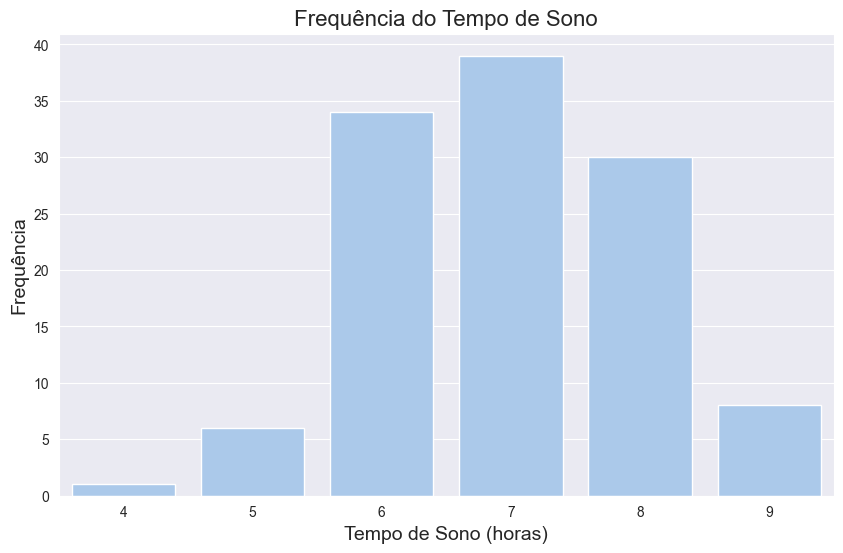

In [436]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=freq_tempo_sono.index, y=freq_tempo_sono.values)

plt.title('Frequência do Tempo de Sono', fontsize=16)
plt.xlabel('Tempo de Sono (horas)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

### Alimentação


@Leandro Fernandes: adicionei handler para variavel categorica ordinal sempre quando possivel caso seja util para tua analise

In [437]:
dados["Alimentação"] = dados_brutos["Alimentação"].copy().astype("category")
ALIMENTORDER = ['Nada saudável', 'Pouco saudável', 'Saudável', 'Razoavelmente saudável','Muito saudável']
dados["Alimentação"] = dados["Alimentação"].cat.reorder_categories(ALIMENTORDER, ordered=True)

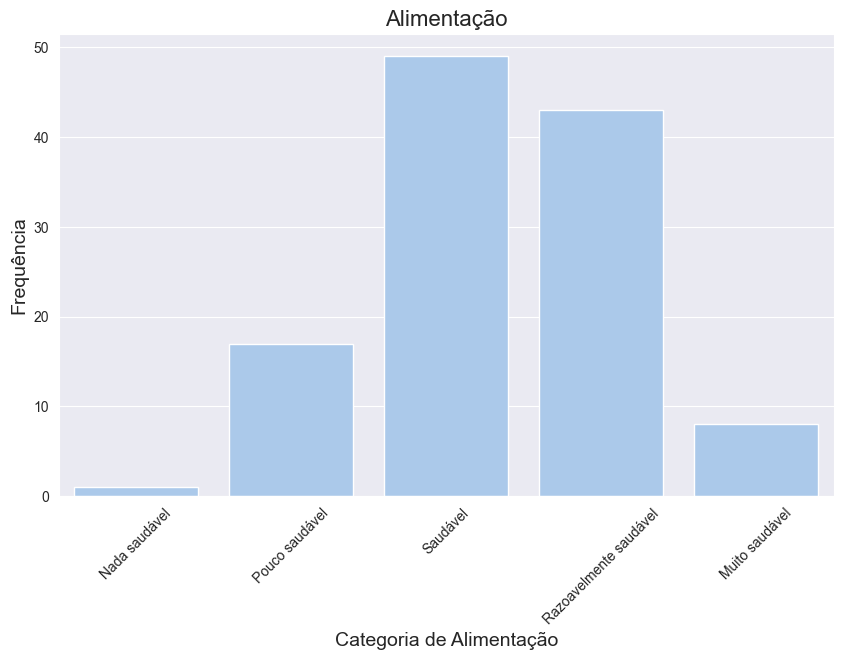

In [438]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Contar a frequência de cada categoria na variável "Alimentação"
freq_alimentacao = dados['Alimentação'].value_counts().reindex(ALIMENTORDER)

# Criar o gráfico de colunas
sns.barplot(x=freq_alimentacao.index, y=freq_alimentacao.values, order=ALIMENTORDER)

# Adicionar título e rótulos
plt.title('Alimentação', fontsize=16)
plt.xlabel('Categoria de Alimentação', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Tempo de Tela

Tratament: Alguns dados foram entrados com hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [439]:
dados['Tempo_tela'] = dados_brutos['Tempo_tela'].round(0).astype(int)
dados['Tempo_tela'].describe()


count    118.000000
mean       6.550847
std        3.214809
min        0.000000
25%        4.000000
50%        6.000000
75%        8.750000
max       17.000000
Name: Tempo_tela, dtype: float64

In [440]:
# Definir os intervalos de 2 horas, ajustando o último bin para incluir 14-16 horas
bins_tempo_tela = list(range(0, 15, 2)) +[18]
tab_freq_tempo_tela = pd.cut(dados['Tempo_tela'], bins=bins_tempo_tela, right=False)
# Contar a frequência e calcular a densidade
freq_tempo_tela = tab_freq_tempo_tela.value_counts().sort_index()
densidade_tempo_tela = freq_tempo_tela / freq_tempo_tela.sum()
densidade_tempo_tela.to_frame("densidade_tempo_tela")

,densidade_tempo_tela
Tempo_tela,
"[0, 2)",0.025424
"[2, 4)",0.144068
"[4, 6)",0.228814
"[6, 8)",0.245763
"[8, 10)",0.144068
"[10, 12)",0.135593
"[12, 14)",0.059322
"[14, 18)",0.016949


@ leandro, note que aqui usei a frequencia no eixo y ao inves da frequencia relativa porque o ultimo intervalo é maior que os demais. Achoq que é isso que o prof. fala no livro. Se for, vale mencionar isso para dizer como este livro de statistica é muito bom.

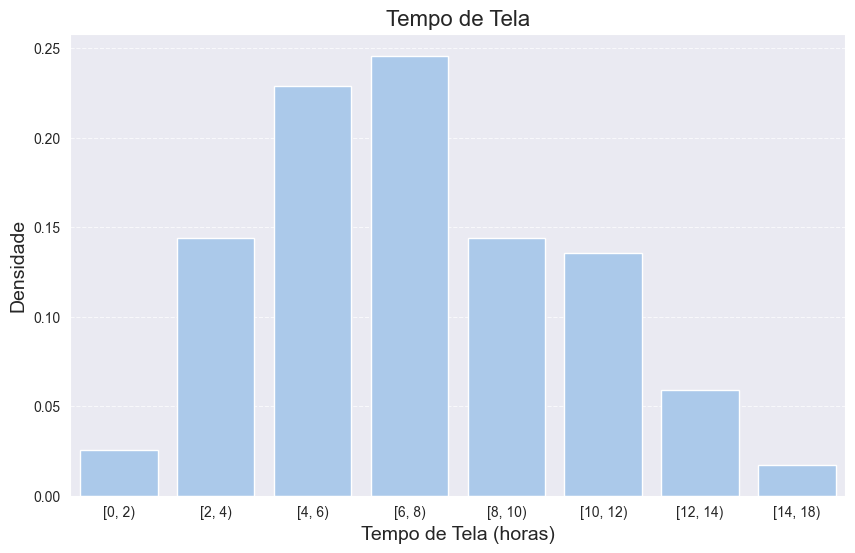

In [441]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Criar o gráfico de colunas
sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)
# sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)


# Adicionar título e rótulos
plt.title('Tempo de Tela', fontsize=16)
plt.xlabel('Tempo de Tela (horas)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(ticks=range(len(bins_tempo_tela) - 1), labels=[f"{i}" for i in bins_tempo_tela[:-1]], rotation=0)


In [442]:
# Criar tabela de frequência para as faixas de 2 horas
tabela_frequencia_tempo_tela = freq_tempo_tela.to_frame(name='Frequência')
tabela_frequencia_tempo_tela.index.name = 'Faixa de Tempo de Tela'
tabela_frequencia_tempo_tela.reset_index(inplace=True)
tabela_frequencia_tempo_tela

,Faixa de Tempo de Tela,Frequência
0,"[0, 2)",3
1,"[2, 4)",17
2,"[4, 6)",27
3,"[6, 8)",29
4,"[8, 10)",17
5,"[10, 12)",16
6,"[12, 14)",7
7,"[14, 18)",2


## Variaveis para composicao da métrica IMC ("variavel dependentes")

### Altura
Nenhum tratamento do dado foi necessario

In [443]:
# Tratamento (nenhum necessario)
dados['Altura'] =dados_brutos['Altura']
dados['Altura'].describe()

count    118.000000
mean     173.635593
std        8.541168
min      150.000000
25%      170.000000
50%      173.000000
75%      180.000000
max      196.000000
Name: Altura, dtype: float64

In [444]:
# Criar os intervalos de 10 cm
bins = range(dados['Altura'].min() // 10 * 10, dados['Altura'].max() // 10 * 10 + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
tab_freq_altura = pd.cut(dados['Altura'], bins=bins, labels=labels, right=False)
tab_freq_altura = tab_freq_altura.value_counts().sort_index()
tab_freq_altura.to_frame("Frequência")

,Frequência
Altura,
150-159,5
160-169,21
170-179,61
180-189,26


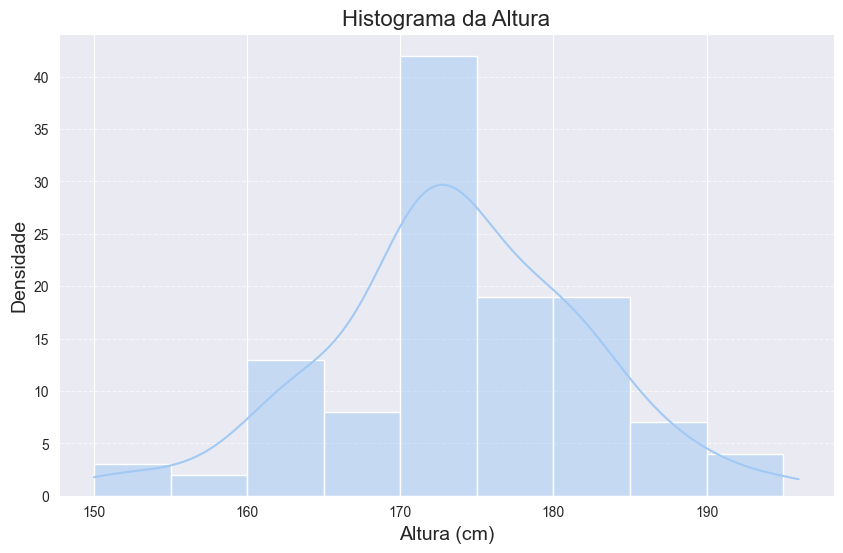

In [445]:
# Create a histogram with nice round bins
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Altura'], bins=range(150, 200, 5), kde=True)

# Add labels and title
plt.title('Histograma da Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Peso
Tratamento: Alguns dados na entrada haviam sido passados como valor decimal. Esses valores foram truncados para o inteiro mais proximo, resultando em todos os dados sendo inteiros

In [446]:
dados['Peso'] = dados_brutos['Peso'].round(0)
dados['Peso'].describe()

count    118.000000
mean      71.440678
std       14.977215
min       42.000000
25%       60.000000
50%       69.500000
75%       80.000000
max      120.000000
Name: Peso, dtype: float64

In [447]:
# Criar os intervalos de 10 kg
bins_peso = range(int(dados['Peso'].min()) // 10 * 10, int(dados['Peso'].max()) // 10 * 10 + 10, 10)
labels_peso = [f"{i}-{i+9}" for i in bins_peso[:-1]]

# Agrupar os dados em faixas de 10 kg e contar as ocorrências
tab_freq_peso = pd.cut(dados['Peso'], bins=bins_peso, labels=labels_peso, right=False)
tab_freq_peso = tab_freq_peso.value_counts().sort_index()
tab_freq_peso.to_frame("Frequência")

,Frequência
Peso,
40-49,3
50-59,21
60-69,35
70-79,28
80-89,15
90-99,10
100-109,4
110-119,1


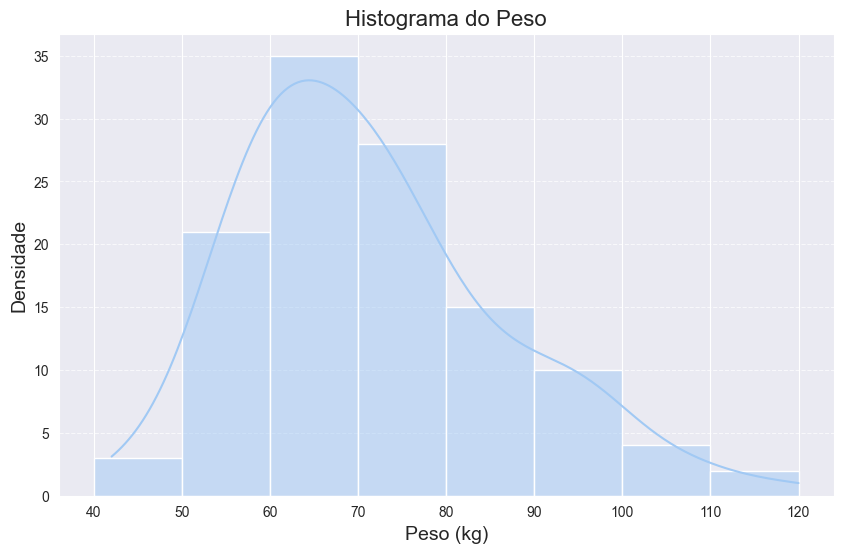

In [448]:
# Criar histograma para a variável "Peso"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Peso'], bins=bins_peso, kde=True)

# Adicionar título e rótulos
plt.title('Histograma do Peso', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### IMC
Tratamento: O IMC foi calculado a partir da altura e do peso, utilizando a formula IMC = peso / (altura * altura). O resultado foi arredondado para duas casas decimais.

#### Construcao da variavel

In [449]:
dados['IMC'] = (dados['Peso'] / ((dados['Altura'] / 100) ** 2)).round(2)
dados['IMC'].describe()

count    118.000000
mean      23.660678
std        4.522529
min       15.620000
25%       20.630000
50%       22.700000
75%       25.480000
max       37.870000
Name: IMC, dtype: float64

#### Descrição da variavel

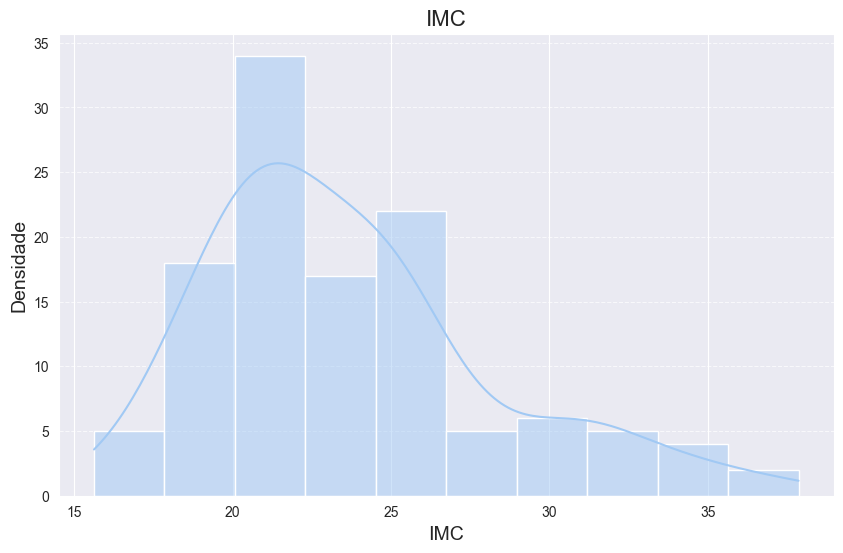

In [450]:
# Criar histograma para a variável "IMC"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['IMC'], bins=10, kde=True)

# Adicionar título e rótulos
plt.title('IMC', fontsize=16)
plt.xlabel('IMC', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Coeficiente de Bowley mostra ligeiro skweness ( assimetria) positivo do dado:



In [451]:
# Calcular os quartis
Q1 = dados['IMC'].quantile(0.25)
Q2 = dados['IMC'].quantile(0.50)
Q3 = dados['IMC'].quantile(0.75)

# Calcular o coeficiente de Bowley
skewness_bowley = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)
print(f"Coef Bowley: {float(skewness_bowley):.3f}")

Coef Bowley: 0.146


#### Interpretação do IMC (faixas de referência)
- Abaixo do peso: IMC < 18.5
- Peso normal: 18.5 <= IMC < 24.9
- Sobrepeso: 25 <= IMC < 29.9
- Obesidade grau 1: 30 <= IMC < 34.9
- Obesidade grau 2: 35 <= IMC < 39.9
- Obesidade grau 3: IMC >= 40


In [452]:
# Categorizar os valores de IMC com base nas faixas de referência
faixas_imc = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade grau 1', 'Obesidade grau 2', 'Obesidade grau 3']
bins_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
dados['Faixa_IMC'] = pd.cut(dados['IMC'], bins=bins_imc, labels=faixas_imc, right=False)
dados['Faixa_IMC'].cat.set_categories(faixas_imc, ordered=True)
freq_faixa_imc = dados['Faixa_IMC'].value_counts().reindex(faixas_imc)
freq_faixa_imc.to_frame("Frequência")

,Frequência
Faixa_IMC,
Abaixo do peso,9
Peso normal,69
Sobrepeso,25
Obesidade grau 1,12
Obesidade grau 2,3
Obesidade grau 3,0


Os dados abaixo retirei de : 
https://sbcbm.org.br/obesidade-atinge-mais-de-67-milhoes-de-pessoas-no-brasil-em-2022/
Mas a fonte e FONTE: SISTEMA DE ViGiLÂNCiA ALIMENTAR E NUTRICIONAL - SiSVAN I MINISTÉRIO DA SAÚDE

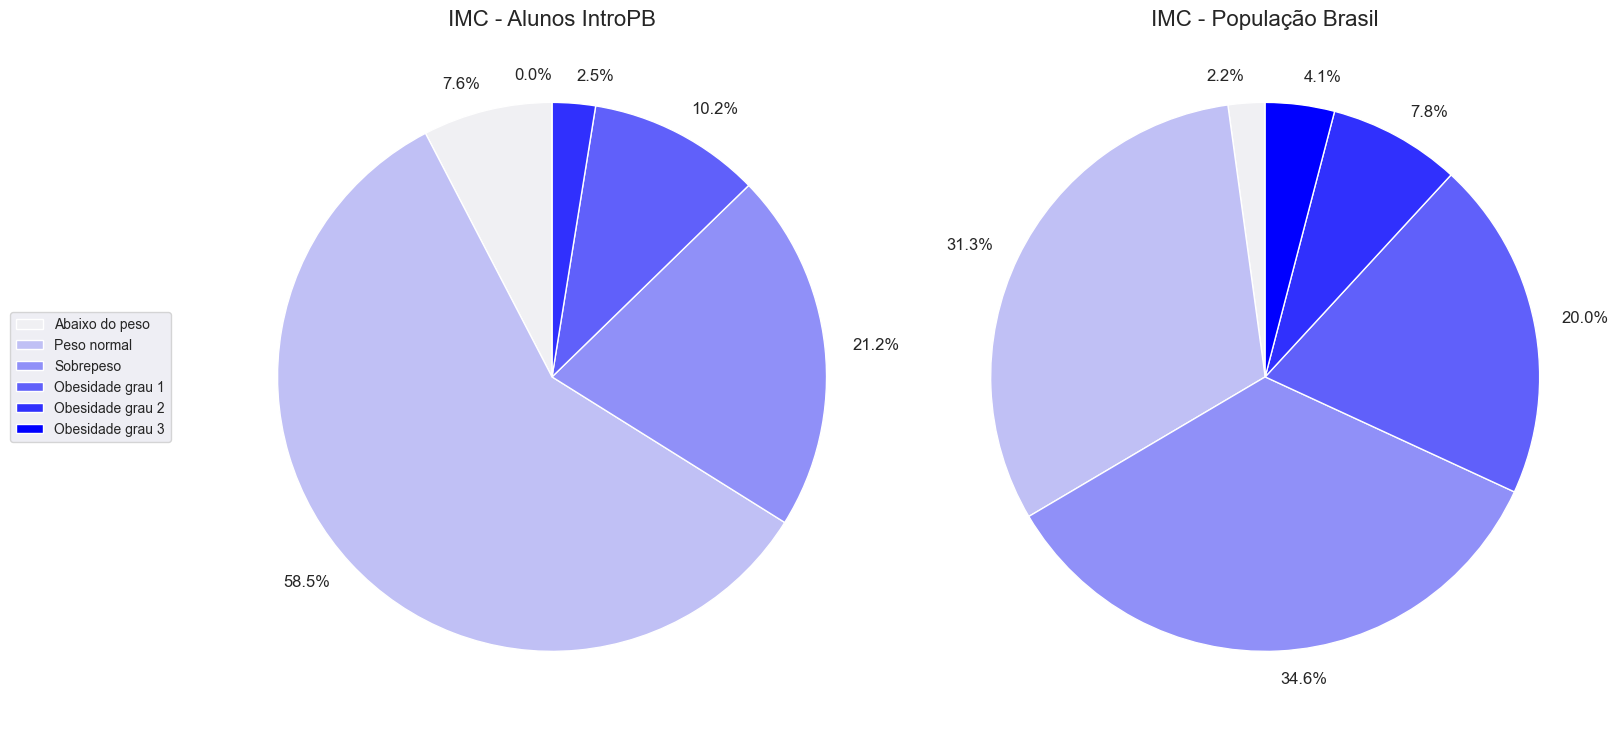

In [453]:
# Tabela com dado de referência
comparativo_imc = freq_faixa_imc.to_frame(name='Alunos_IntroPB')
comparativo_imc['Alunos_IntroPB'] = comparativo_imc['Alunos_IntroPB'] / comparativo_imc['Alunos_IntroPB'].sum()
DATABRL = [0.0217, 0.3132, 0.3463, 0.2004, 0.0777, 0.0407]
assert sum(DATABRL) == 1    
comparativo_imc["Populacao_Brasil"] = DATABRL
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico da esquerda: Alunos_IntroPB
axes[0].pie(
    comparativo_imc['Alunos_IntroPB'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Alunos_IntroPB']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[0].set_title('IMC - Alunos IntroPB', fontsize=16)
axes[0].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(-0.3, 0.5))

# Gráfico da direita: Populacao_Brasil
axes[1].pie(
    comparativo_imc['Populacao_Brasil'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Populacao_Brasil']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[1].set_title('IMC - População Brasil', fontsize=16)
# axes[1].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

In [454]:
comparativo_imc

,Alunos_IntroPB,Populacao_Brasil
Faixa_IMC,,
Abaixo do peso,0.076271,0.0217
Peso normal,0.584746,0.3132
Sobrepeso,0.211864,0.3463
Obesidade grau 1,0.101695,0.2004
Obesidade grau 2,0.025424,0.0777
Obesidade grau 3,0.000000,0.0407


#### IMC vs. valores esperados por uma normal

A conclusão é que a turma desvia um pouco da distribuição normal,especialmente nos extremos, onde a turma apresenta tails mais longos. Isso pode ser resultado de que a amostra da turma e pequena, ou não é representativa da população brasileir (oque faz muito sentido.)

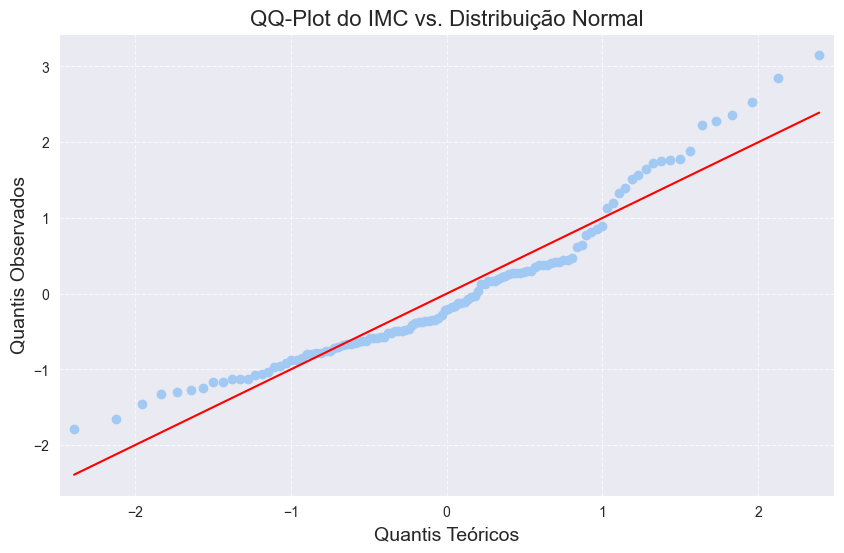

In [455]:
plt.figure(figsize=(10, 6))
qqplot(dados['IMC'], line='s', ax=plt.gca(),  fit=True)
plt.title('QQ-Plot do IMC vs. Distribuição Normal', fontsize=16)
plt.xlabel('Quantis Teóricos', fontsize=14)
plt.ylabel('Quantis Observados', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

@ Se der tempo (e encontrarmos o dado na internet), para o relatorio, seria interesente fazer um QQPlot comparando a distribuicao do IMC da classe com o o IMC da populacao brasileira. Tenho impressao que estamos mais no shape do que media da populacao.


## Notas para a parte C

Até aqui cumprimos com quase todos os topicos do livro do capitulo 1: 
 - tabelas de frequencia
 - graficos de barra (desidade vs. frequencia)
 - histogramas
 - grafico setor
 - qq plot

A parte C deveria apresentar pelo menos:
 - box-plot (na comparacao da distribuica do IMC aberto por varivel categorica)
 - grafico de dispersao (IMC vs. variavel continua "Indice de saudabilidade) (se formos criar e usar caso o resultdo nao fique bom...)
 
